<a href="https://colab.research.google.com/github/9100Naveen/CSA4705-DL/blob/main/EXPERIMENTS_10_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Loaded: IRIS
Features: 4 | Classes: 3

✅ Model Accuracy: 100.00%

Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



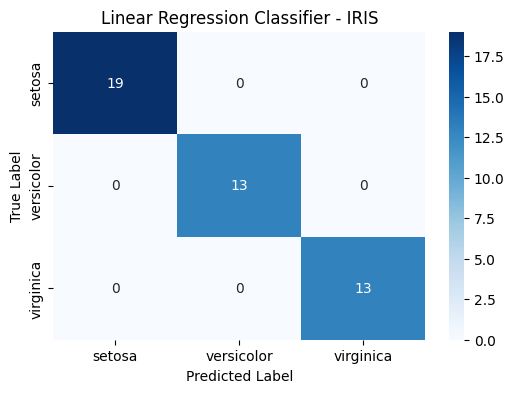

In [ ]:
## EXPERIMENT-11
# ------------------------------------------------------------
# Performance Evaluation of Linear Regression Classifier
# Using Iris or Breast Cancer Dataset
# ------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 1️⃣ Select dataset: 'iris' or 'breast_cancer'
dataset_choice = 'iris'   # Change to 'breast_cancer' to test that dataset

if dataset_choice == 'iris':
    data = datasets.load_iris()
else:
    data = datasets.load_breast_cancer()

X = data.data
y = data.target
target_names = data.target_names

print(f"Dataset Loaded: {dataset_choice.upper()}")
print("Features:", X.shape[1], "| Classes:", len(np.unique(y)))

# 2️⃣ Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3️⃣ Standardize features (important for regression-based models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4️⃣ Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 5️⃣ Predict (Continuous output → convert to class labels)
y_pred_continuous = model.predict(X_test)
y_pred = np.round(y_pred_continuous).astype(int)

# Ensure predictions are within valid label range
y_pred = np.clip(y_pred, 0, len(np.unique(y)) - 1)

# 6️⃣ Evaluate Model Performance
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=target_names)

print(f"\n✅ Model Accuracy: {acc * 100:.2f}%")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# 7️⃣ Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=target_names, yticklabels=target_names)
plt.title(f"Linear Regression Classifier - {dataset_choice.upper()}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


✅ Dataset Loaded: BREAST_CANCER
Features: 30 | Classes: 2

🎯 Model Accuracy: 97.08%

Confusion Matrix:
 [[ 59   4]
 [  1 107]]

Classification Report:
               precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        63
      benign       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



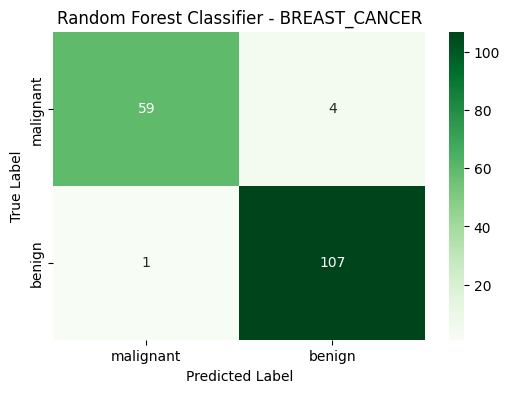

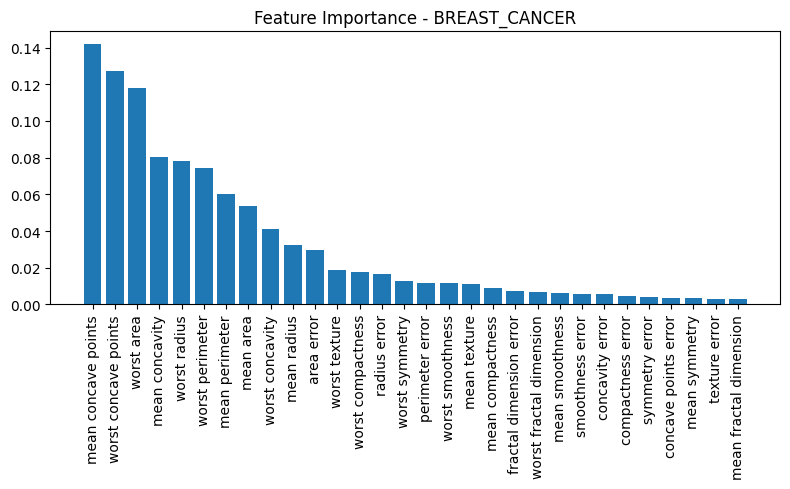

In [ ]:
#
##EXPERIMENT-12 ------------------------------------------------------------
# Performance Evaluation of Random Forest Classifier
# Using Iris or Breast Cancer Dataset
# ------------------------------------------------------------

# 1️⃣ Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 2️⃣ Choose Dataset: 'iris' or 'breast_cancer'
dataset_choice = 'breast_cancer'   # 🔄 change to 'iris' if needed

# 3️⃣ Load Dataset
if dataset_choice == 'iris':
    data = datasets.load_iris()
else:
    data = datasets.load_breast_cancer()

X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

print(f"✅ Dataset Loaded: {dataset_choice.upper()}")
print(f"Features: {X.shape[1]} | Classes: {len(np.unique(y))}")

# 4️⃣ Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5️⃣ Normalize the Data (optional for tree models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6️⃣ Build the Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=100,         # number of trees
    max_depth=None,           # let trees expand fully
    random_state=42
)
rf_model.fit(X_train, y_train)

# 7️⃣ Make Predictions
y_pred = rf_model.predict(X_test)

# 8️⃣ Evaluate Model Performance
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=target_names)

print(f"\n🎯 Model Accuracy: {acc * 100:.2f}%")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# 9️⃣ Confusion Matrix Visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=target_names, yticklabels=target_names)
plt.title(f"Random Forest Classifier - {dataset_choice.upper()}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 🔟 Feature Importance Visualization
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.title(f"Feature Importance - {dataset_choice.upper()}")
plt.tight_layout()
plt.show()


✅ Dataset Loaded: BREAST_CANCER
Features: 30 | Classes: 2

🎯 Model Accuracy: 96.49%

Confusion Matrix:
 [[ 59   4]
 [  2 106]]

Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.94      0.95        63
      benign       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



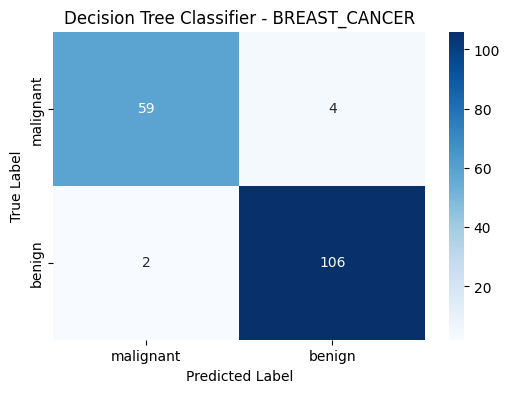

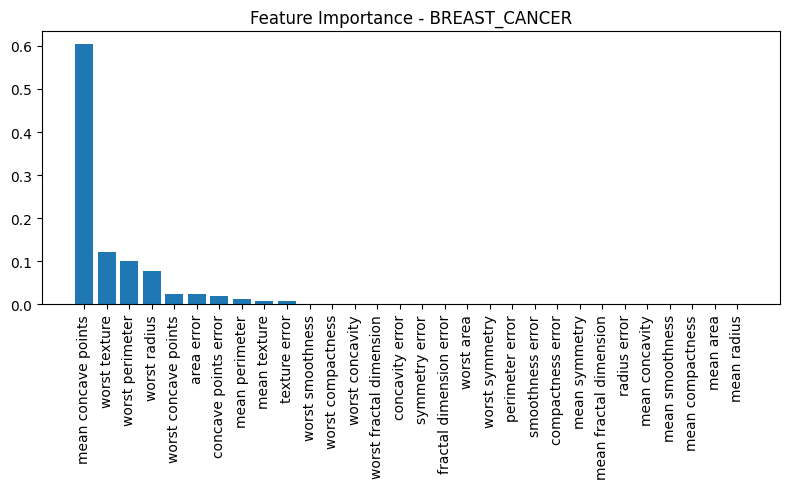

In [ ]:
# ------------------------------------------------------------
# Performance Evaluation of Decision Tree Classifier
# Using Iris or Breast Cancer Dataset
# ------------------------------------------------------------

# 1️⃣ Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 2️⃣ Choose Dataset: 'iris' or 'breast_cancer'
dataset_choice = 'breast_cancer'  # 🔄 Change to 'iris' if needed

# 3️⃣ Load Dataset
if dataset_choice == 'iris':
    data = datasets.load_iris()
else:
    data = datasets.load_breast_cancer()

X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

print(f"✅ Dataset Loaded: {dataset_choice.upper()}")
print(f"Features: {X.shape[1]} | Classes: {len(np.unique(y))}")

# 4️⃣ Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5️⃣ Normalize the Data (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6️⃣ Build the Decision Tree Classifier
dt_model = DecisionTreeClassifier(
    criterion='entropy',   # measure of impurity ('gini' or 'entropy')
    max_depth=None,        # full depth by default
    random_state=42
)
dt_model.fit(X_train, y_train)

# 7️⃣ Make Predictions
y_pred = dt_model.predict(X_test)

# 8️⃣ Evaluate Performance
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=target_names)

print(f"\n🎯 Model Accuracy: {acc * 100:.2f}%")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# 9️⃣ Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title(f"Decision Tree Classifier - {dataset_choice.upper()}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 🔟 Visualize the Decision Tree (for small feature sets like IRIS)
if dataset_choice == 'iris':
    plt.figure(figsize=(16,8))
    plot_tree(dt_model,
              filled=True,
              feature_names=feature_names,
              class_names=target_names,
              rounded=True)
    plt.title("Decision Tree Visualization - IRIS Dataset")
    plt.show()

# 1️⃣1️⃣ Display Feature Importance
importances = dt_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.title(f"Feature Importance - {dataset_choice.upper()}")
plt.tight_layout()
plt.show()


✅ Dataset Loaded: BREAST_CANCER
Features: 30 | Classes: 2

🎯 Model Accuracy (k=5): 95.91%

Confusion Matrix:
 [[ 59   4]
 [  3 105]]

Classification Report:
               precision    recall  f1-score   support

   malignant       0.95      0.94      0.94        63
      benign       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



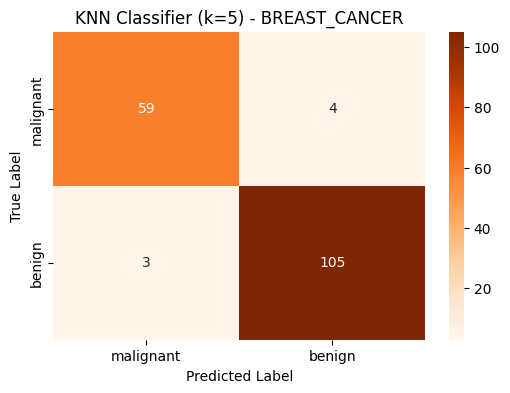

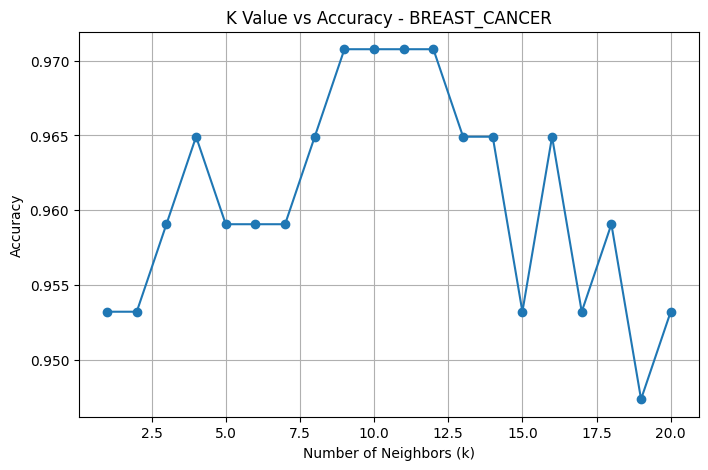

✅ Best Accuracy 97.08% at k = 9


In [ ]:
#
##EXPERIME-14

 ------------------------------------------------------------
# Performance Evaluation of K-Nearest Neighbor Classifier
# Using Iris or Breast Cancer Dataset
# ------------------------------------------------------------

# 1️⃣ Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 2️⃣ Choose Dataset: 'iris' or 'breast_cancer'
dataset_choice = 'breast_cancer'   # 🔄 change to 'iris' if desired

# 3️⃣ Load Dataset
if dataset_choice == 'iris':
    data = datasets.load_iris()
else:
    data = datasets.load_breast_cancer()

X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

print(f"✅ Dataset Loaded: {dataset_choice.upper()}")
print(f"Features: {X.shape[1]} | Classes: {len(np.unique(y))}")

# 4️⃣ Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5️⃣ Normalize Features (Important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6️⃣ Build the KNN Model
k = 5   # number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# 7️⃣ Make Predictions
y_pred = knn_model.predict(X_test)

# 8️⃣ Evaluate Model Performance
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=target_names)

print(f"\n🎯 Model Accuracy (k={k}): {acc * 100:.2f}%")
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

# 9️⃣ Confusion Matrix Visualization
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=target_names, yticklabels=target_names)
plt.title(f"KNN Classifier (k={k}) - {dataset_choice.upper()}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 🔟 Accuracy vs. K-value Plot
k_values = range(1, 21)
accuracies = []

for i in k_values:
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    y_pred_i = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_i))

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o')
plt.title(f"K Value vs Accuracy - {dataset_choice.upper()}")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

print(f"✅ Best Accuracy {max(accuracies)*100:.2f}% at k = {np.argmax(accuracies)+1}")


✅ Dataset Loaded: BREAST_CANCER
Features: 30 | Classes: 2

🔹 SVM with LINEAR Kernel
🎯 Accuracy: 97.66%
Confusion Matrix:
 [[ 61   2]
 [  2 106]]
Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



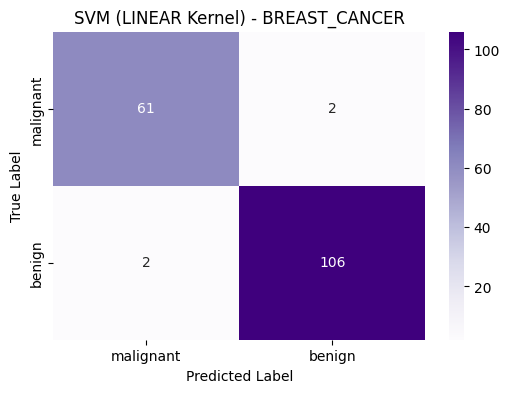


🔹 SVM with POLY Kernel
🎯 Accuracy: 89.47%
Confusion Matrix:
 [[ 45  18]
 [  0 108]]
Classification Report:
               precision    recall  f1-score   support

   malignant       1.00      0.71      0.83        63
      benign       0.86      1.00      0.92       108

    accuracy                           0.89       171
   macro avg       0.93      0.86      0.88       171
weighted avg       0.91      0.89      0.89       171



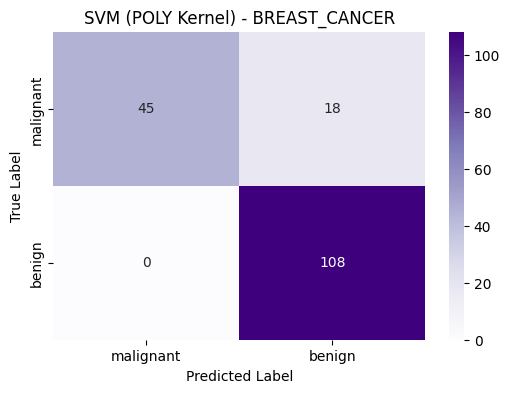


🔹 SVM with RBF Kernel
🎯 Accuracy: 97.66%
Confusion Matrix:
 [[ 61   2]
 [  2 106]]
Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



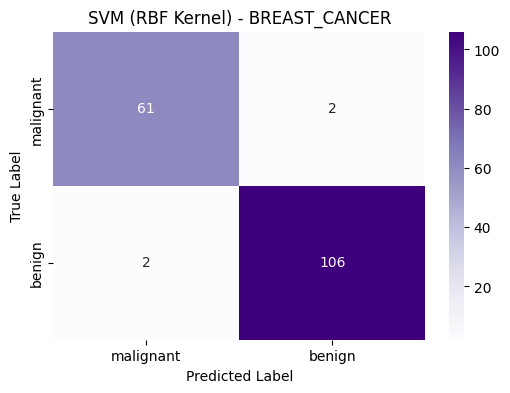

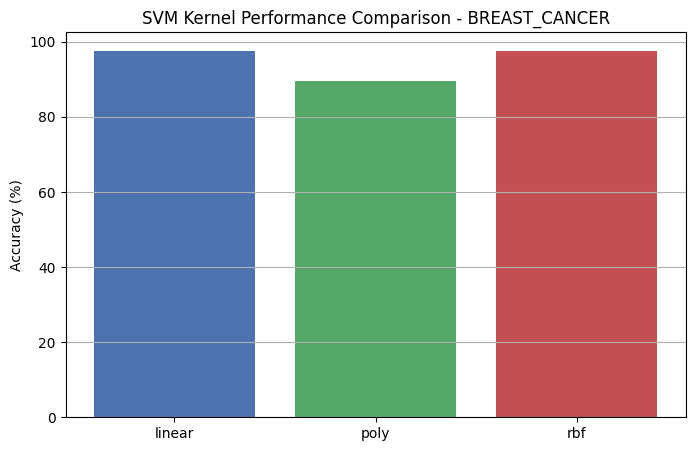


🏆 Best Performing Kernel: LINEAR (97.66% Accuracy)


In [ ]:
#
##EXPERIMENT-15------------------------------------------------------------
# Performance Evaluation of Support Vector Machine Classifier
# Using Iris or Breast Cancer Dataset
# ------------------------------------------------------------

# 1️⃣ Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 2️⃣ Choose Dataset: 'iris' or 'breast_cancer'
dataset_choice = 'breast_cancer'   # 🔄 change to 'iris' if needed

# 3️⃣ Load Dataset
if dataset_choice == 'iris':
    data = datasets.load_iris()
else:
    data = datasets.load_breast_cancer()

X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

print(f"✅ Dataset Loaded: {dataset_choice.upper()}")
print(f"Features: {X.shape[1]} | Classes: {len(np.unique(y))}")

# 4️⃣ Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5️⃣ Normalize the Data (Very Important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6️⃣ Train SVM Classifier with Different Kernels
kernels = ['linear', 'poly', 'rbf']
accuracy_results = {}

for kernel in kernels:
    svm_model = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=target_names)

    print(f"\n==============================")
    print(f"🔹 SVM with {kernel.upper()} Kernel")
    print(f"==============================")
    print(f"🎯 Accuracy: {acc * 100:.2f}%")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", report)

    accuracy_results[kernel] = acc

    # Plot Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f"SVM ({kernel.upper()} Kernel) - {dataset_choice.upper()}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# 7️⃣ Compare Kernel Performance
plt.figure(figsize=(8,5))
plt.bar(accuracy_results.keys(), [v*100 for v in accuracy_results.values()], color=['#4c72b0','#55a868','#c44e52'])
plt.title(f"SVM Kernel Performance Comparison - {dataset_choice.upper()}")
plt.ylabel("Accuracy (%)")
plt.grid(axis='y')
plt.show()

best_kernel = max(accuracy_results, key=accuracy_results.get)
print(f"\n🏆 Best Performing Kernel: {best_kernel.upper()} ({accuracy_results[best_kernel]*100:.2f}% Accuracy)")
